# Task 1 Classify text

In [1]:
# import package

import nltk
import pandas as pd
import re
import nltk.data
from nltk.collocations import *
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import numpy as np
import string
import matplotlib.pyplot as plt
from nltk.probability import *
from nltk.corpus import stopwords
from itertools import chain

In [2]:
# load the file from excel and turn them into an dataframe
excel_df = pd.ExcelFile("News Title.xls")

## Find the top 5 words in each category

In [3]:
# get the stop words
stop = stopwords.words('english')
# create an empty list for each category
tech_list = []
busi_list = []
enter_list = []
med_list = []
# get the news title and category and change the name of the "News Title" to "News_Title"
df = excel_df.parse(0)[["News Title", "Category"]].rename(columns = {"News Title":"News_Title"})
# use regular experssion and get the token using the regular expression and delete stop words
tokenizer = RegexpTokenizer(r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?")
df["News_Title"] = df["News_Title"].str.lower().apply(tokenizer.tokenize)\
    .apply(lambda x: [item for item in x if item not in stop])
# apply loop to get the words to the category
for index, row in df.iterrows():
    if row["Category"] == "Technology":
        tech_list += row["News_Title"]
    elif row["Category"] == "Medical":
        med_list += row["News_Title"]
    elif row["Category"] == "Business":
        busi_list += row["News_Title"]
    elif row["Category"] == "Entertainment":
        enter_list += row["News_Title"]

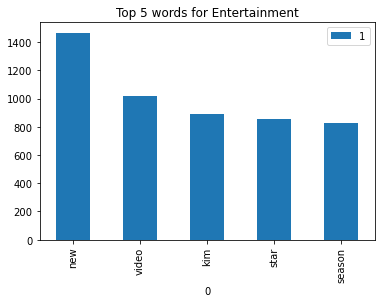

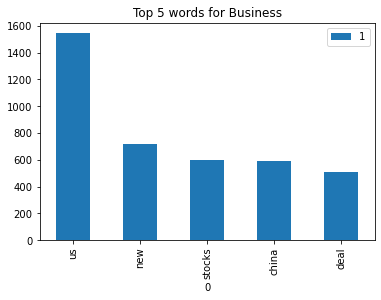

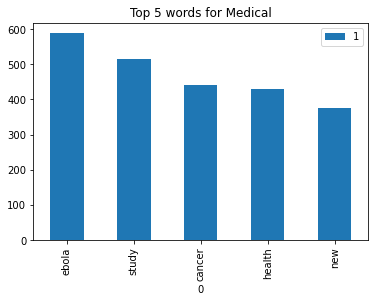

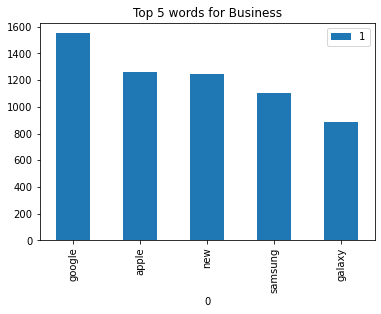

In [4]:
# get the frequency of the list of category and plot top 5 words of the category
fd_2 = FreqDist(enter_list)
pd.DataFrame(fd_2.most_common(5)).set_index(0).plot.bar()
plt.title("Top 5 words for Entertainment")
fd_2 = FreqDist(busi_list)
pd.DataFrame(fd_2.most_common(5)).set_index(0).plot.bar()
plt.title("Top 5 words for Business")
fd_2 = FreqDist(med_list)
pd.DataFrame(fd_2.most_common(5)).set_index(0).plot.bar()
plt.title("Top 5 words for Medical")
fd_2 = FreqDist(tech_list)
pd.DataFrame(fd_2.most_common(5)).set_index(0).plot.bar()
plt.title("Top 5 words for Business")
plt.show()

## Classify the words

using below regular expression we can get the word inside the data

```python
r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
```

In linguistic morphology and information retrieval, stemming is the process of reducing inflected words to their word stem, base or root form—generally a written word form. therefore we need to stemming the data in order to get the same word such as

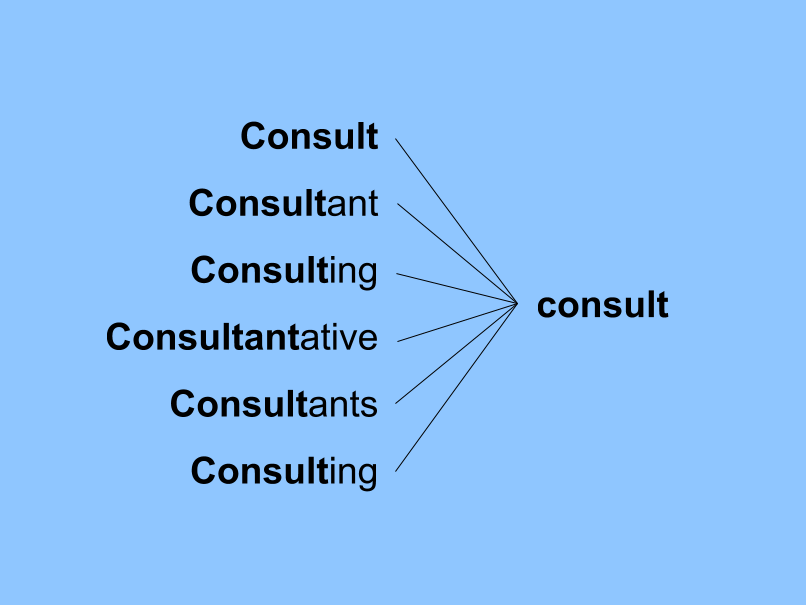

For example above there are many word type of word consult using stemming all type of "consult" word can be transform into "consult"

and last will be removing all punctuation using this regular expression

```python
'[^\w\s]'
```

and replace them with empty string.

In [5]:
# get the news title and category and change the name of the "News Title" to "News_Title"
df = excel_df.parse(0)[["News Title", "Category"]].rename(columns = {"News Title":"News_Title"})
# generate a random number to categorize the category
df['category_id'] = df['Category'].factorize()[0]
# load the porterstem
stemmer = PorterStemmer()
# use regular experssion and get the token using the regular expression 
tokenizer = RegexpTokenizer(r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?")
df["News_Title"] = df["News_Title"].apply(tokenizer.tokenize)\
    .apply(lambda x: [item for item in x if item not in stop])\
    .apply(lambda x: [stemmer.stem(y.lower()) for y in x]).apply(' '.join)\
    .str.replace('[^\w\s]','')

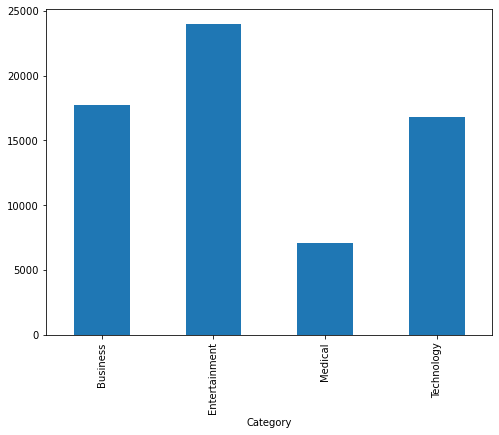

In [6]:
# We see that the number of words in each category.
fig = plt.figure(figsize=(8,6))
df.groupby('Category').News_Title.count().plot.bar(ylim=0)
plt.show()

In [7]:
# import some packages
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import random

random.seed(123)
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df['News_Title'], df['Category'], random_state = 0)
# Convert a collection of text documents to a matrix of token counts
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
# Transform a count matrix to a normalized tf or tf-idf representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# fit the data with the label
nlb = MultinomialNB().fit(X_train_tfidf, y_train)

In [8]:
# predict the test data
predict_test = nlb.predict(tfidf_transformer.fit_transform(count_vect.transform(X_test)))
predict_train = nlb.predict(tfidf_transformer.fit_transform(count_vect.transform(X_train)))

In [9]:
# get the accuracy of the data
from sklearn.metrics import accuracy_score
print("Accuracy of predicting test data :",accuracy_score(predict_test, y_test))
print("Accuracy of predicting train data :",accuracy_score(predict_train, y_train))

Accuracy of predicting test data : 0.8936767578125
Accuracy of predicting train data : 0.9201033549673455


In [10]:
# input the sentence into the model
def predicted_category(word):
    # evaluate the string dictionary
    dict_string = eval(word)
    word = dict_string["text"]
    d = [word]
    asa = pd.DataFrame(d)[0].apply(tokenizer.tokenize)\
        .apply(lambda x: [item for item in x if item not in stop])\
        .apply(lambda x: [stemmer.stem(y.lower()) for y in x]).apply(' '.join)\
        .str.replace('[^\w\s]','')
    predict = nlb.predict(tfidf_transformer.fit_transform(count_vect.transform(asa)))
    return "{prediction : "+ predict[0] + '}'

In [11]:
predicted_category('{"text" :"Google shows off Androids for wearables, cars, and TVs", "type":"news"}')

'{prediction : Technology}'